In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_acquisition=pd.read_csv(r'C:\Users\acer pc\Desktop\python\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv')
repayment_data=pd.read_csv(r'C:\Users\acer pc\Desktop\python\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')
spend_data=pd.read_csv(r'C:\Users\acer pc\Desktop\python\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')

In [3]:
repayment_data

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [4]:
####dropping columns Slno unnamed:4
repayment_data.drop(['SL No:','Unnamed: 4'],axis=1,inplace=True)

In [5]:
####dropping null values
repayment_data.dropna(axis=0,inplace=True)

In [6]:
repayment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [7]:
###changing the data type of month to date time.
repayment_data.Month=pd.to_datetime(repayment_data.Month)

In [8]:
###changing the data type of Month
spend_data.Month=pd.to_datetime(spend_data.Month)

In [9]:
#####dropping column 'No' in customer_acquisition.
customer_acquisition=customer_acquisition.drop(columns='No')

In [10]:
customer_acquisition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [11]:
repayment_data.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [12]:
spend_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


# 1. In the above dataset,


# a. In case age is less than 18, replace it with mean of age values.

In [13]:
customer_acquisition.Age[customer_acquisition.Age<18]=customer_acquisition.Age.mean()
customer_acquisition

C:\Users\acer pc\AppData\Local\Temp\ipykernel_10556\3003302630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_acquisition.Age[customer_acquisition.Age<18]=customer_acquisition.Age.mean()


,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [14]:
customer_spend_trans=pd.merge(left=customer_acquisition,right=spend_data,on='Customer')
customer_spend_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Age       1500 non-null   float64       
 2   City      1500 non-null   object        
 3   Product   1500 non-null   object        
 4   Limit     1500 non-null   float64       
 5   Company   1500 non-null   object        
 6   Segment   1500 non-null   object        
 7   Sl No:    1500 non-null   int64         
 8   Month     1500 non-null   datetime64[ns]
 9   Type      1500 non-null   object        
 10  Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 140.6+ KB


In [15]:
customer_spend_trans.Amount=np.where(customer_spend_trans.Amount>customer_spend_trans.Limit,customer_spend_trans.Limit*0.5,customer_spend_trans.Amount)
customer_spend_trans

,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
customer_repayment_trans=pd.merge(left=customer_acquisition,right=repayment_data,on='Customer')
customer_repayment_trans

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [17]:
customer_repayment_trans.Amount=np.where(customer_repayment_trans.Amount>customer_repayment_trans.Limit,customer_repayment_trans.Limit,customer_repayment_trans.Amount)
customer_repayment_trans

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


# 2. From the above dataset create the following summaries:
a. How many distinct customers exist?

In [18]:
print(customer_repayment_trans.Customer.drop_duplicates().count(),'distinct customers exist')

100 distinct customers exist


In [19]:
print(customer_spend_trans.Customer.drop_duplicates().count(),'distinct customers exist')

100 distinct customers exist


# b. How many distinct categories exist?

In [146]:
customer_repayment_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer         1500 non-null   object        
 1   Age              1500 non-null   float64       
 2   City             1500 non-null   object        
 3   Product          1500 non-null   object        
 4   Limit            1500 non-null   float64       
 5   Company          1500 non-null   object        
 6   Segment          1500 non-null   object        
 7   Month            1500 non-null   datetime64[ns]
 8   Amount           1500 non-null   float64       
 9   repayment_month  1500 non-null   int64         
 10  repayment_year   1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 140.6+ KB


In [148]:
customer_spend_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     1500 non-null   object        
 1   Age          1500 non-null   float64       
 2   City         1500 non-null   object        
 3   Product      1500 non-null   object        
 4   Limit        1500 non-null   float64       
 5   Company      1500 non-null   object        
 6   Segment      1500 non-null   object        
 7   Sl No:       1500 non-null   int64         
 8   Month        1500 non-null   datetime64[ns]
 9   Type         1500 non-null   object        
 10  Amount       1500 non-null   float64       
 11  spend_month  1500 non-null   int64         
 12  spend_year   1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 196.4+ KB


# c. What is the average monthly spend by customers?

In [22]:
customer_spend_trans['spend_month']=customer_spend_trans.Month.dt.month
customer_spend_trans.head()

,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,spend_month
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1


In [23]:
avg_monthly_spend=customer_spend_trans.groupby(["Customer","spend_month"]).agg(avg_spend=("Amount","mean"))
avg_monthly_spend.head(10)

avg_spend
Customer spend_month               
A1       1            372762.587143
         2            175235.690000
         4            261649.250000
         5            361141.310000
         8            344372.100000
         10           244534.680000
         11           183839.610000
A10      1            161144.326667
         2            194557.667500
         3            134631.266667

# d. What is the average monthly repayment by customers?

In [24]:
customer_repayment_trans['repayment_month']=customer_repayment_trans.Month.dt.month
customer_repayment_trans.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,repayment_month
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1


In [25]:
avg_monthly_repayment=customer_repayment_trans.groupby(['Customer','repayment_month']).agg(avg_repayment=('Amount','mean'))
avg_monthly_repayment.head(10)

avg_repayment
Customer repayment_month               
A1       1                343972.327143
         2                156374.760000
         4                254474.580000
         7                297176.740000
         9                186427.500000
         11               285729.090000
A10      1                272897.385000
         2                217344.503333
         3                240130.543333
         4                159582.470000

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [149]:
monthly_customers=pd.merge(left=customer_spend_trans,right=customer_repayment_trans,on='Customer')

In [157]:
monthly_customers.rename({'Amount_x':'spend_amount','Amount_y':'repayment_amount'},axis=1,inplace=True)

In [159]:
monthly_customers['Monthly_profit']=monthly_customers.repayment_amount-monthly_customers.spend_amount


In [169]:
monthly_customers=monthly_customers.drop(columns=['Company_x','Sl No:','Type','Age_y'])

In [172]:
monthly_customers.head()

,Customer,Month_x,spend_amount,spend_month,spend_year,Month_y,repayment_amount,repayment_month,repayment_year,Monthly_profit
0,A1,2004-01-12,485470.8,1,2004,2004-01-12,495414.75,1,2004,9943.95
1,A1,2004-01-12,485470.8,1,2004,2004-01-03,245899.02,1,2004,-239571.78
2,A1,2004-01-12,485470.8,1,2004,2004-01-15,259490.06,1,2004,-225980.74
3,A1,2004-01-12,485470.8,1,2004,2004-01-25,437555.12,1,2004,-47915.68
4,A1,2004-01-12,485470.8,1,2004,2005-01-17,165972.88,1,2005,-319497.92


In [173]:
monthly_customers['Profit']=np.where(monthly_customers.Monthly_profit>0,monthly_customers.Monthly_profit*0.029,np.nan)

In [178]:
monthly_customers.head(30)

,Customer,Month_x,spend_amount,spend_month,spend_year,Month_y,repayment_amount,repayment_month,repayment_year,Monthly_profit,Profit
0,A1,2004-01-12,485470.80,1,2004,2004-01-12,495414.75,1,2004,9943.95,288.37455
1,A1,2004-01-12,485470.80,1,2004,2004-01-03,245899.02,1,2004,-239571.78,NaN
2,A1,2004-01-12,485470.80,1,2004,2004-01-15,259490.06,1,2004,-225980.74,NaN
3,A1,2004-01-12,485470.80,1,2004,2004-01-25,437555.12,1,2004,-47915.68,NaN
4,A1,2004-01-12,485470.80,1,2004,2005-01-17,165972.88,1,2005,-319497.92,NaN
5,A1,2004-01-12,485470.80,1,2004,2005-02-23,365366.62,2,2005,-120104.18,NaN
6,A1,2004-01-12,485470.80,1,2004,2005-02-01,14473.41,2,2005,-470997.39,NaN
7,A1,2004-01-12,485470.80,1,2004,2004-01-12,350446.82,1,2004,-135023.98,NaN
8,A1,2004-01-12,485470.80,1,2004,2004-02-05,117964.43,2,2004,-367506.37,NaN
9,A1,2004-01-12,485470.80,1,2004,2006-04-19,79849.19,4,2006,-405621.61,NaN


# f. What are the top 5 product types?

In [26]:
customer_spend_trans.Type.value_counts().sort_values(ascending=False)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
MOVIE TICKET     76
RENTAL           76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

# g. Which city is having maximum spend?


In [27]:
customer_spend_trans.groupby(['City']).Amount.sum().reset_index().sort_values(by='Amount',ascending=False)

#COCHIN city having maximun spend.

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


# h. Which age group is spending more money?

In [142]:
customer_spend_trans.groupby(["Age"]).Amount.sum().reset_index().sort_values('Amount',ascending=False)
##Age of 28 years spending more money.

,Age,Amount
6,28.00,17365270.23
22,46.49,15872551.38
50,78.00,12329508.54
14,37.00,9992645.71
3,25.00,9749700.72
26,51.00,9670808.79
23,47.00,9157809.12
20,44.00,9002326.39
7,29.00,8231607.26
25,50.00,8082803.39


# i. Who are the top 10 customers in terms of repayment?

In [222]:
customer_repayment_trans.groupby('Customer').Amount.sum().sort_values(ascending=False).head(10).reset_index()

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [29]:
customer_spend_trans['spend_year']=customer_spend_trans.Month.dt.year

In [33]:
customer_spend_by_year=pd.pivot_table(data=customer_spend_trans,index=['City','spend_year'],columns='Product',values='Amount',aggfunc='sum')

<function matplotlib.pyplot.show(close=None, block=None)>

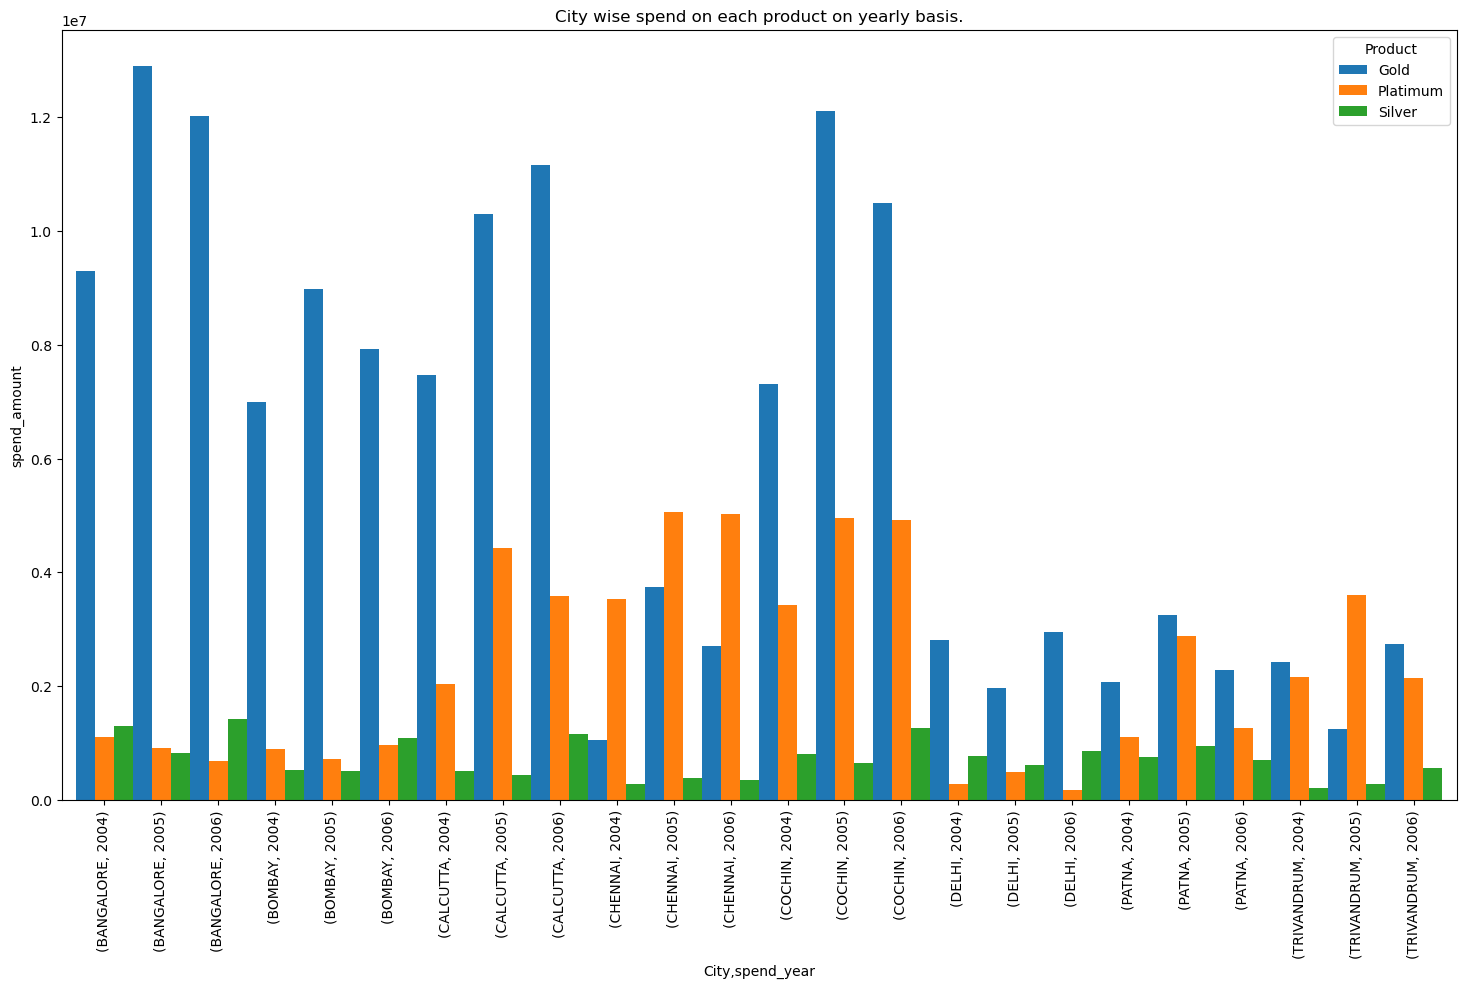

In [62]:
customer_spend_by_year.plot(kind='bar',figsize=(18,10),width=1.0)
plt.ylabel('spend_amount')
plt.title('City wise spend on each product on yearly basis.')
plt.show

# 4. Create graphs for

# a. Monthly comparison of total spends, city wise

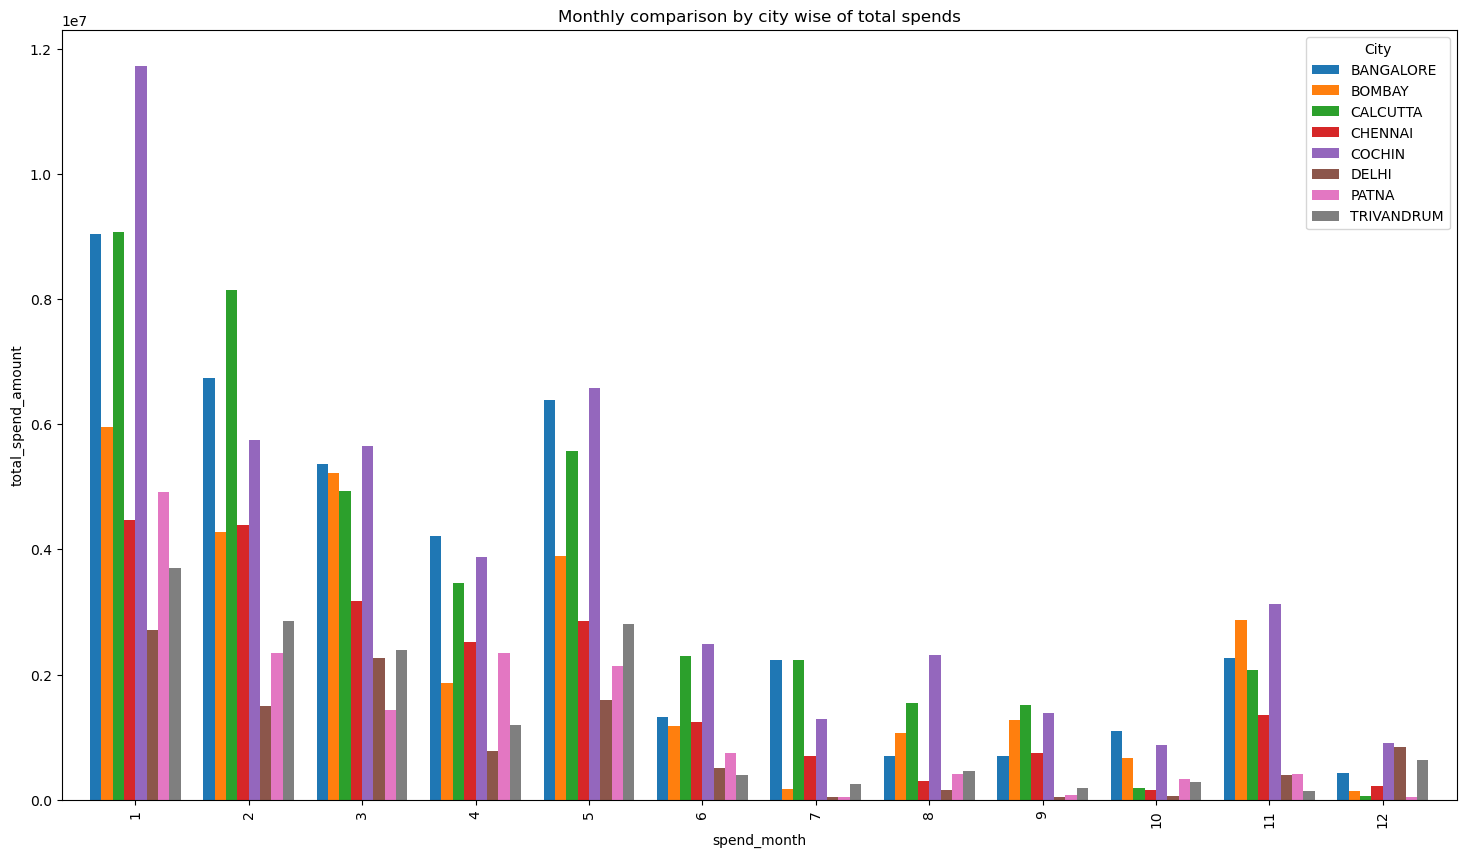

In [92]:
monthly_compare=pd.pivot_table(data=customer_spend_trans,index='spend_month',columns='City',values='Amount',aggfunc='sum')
monthly_compare.plot(kind='bar',figsize=(18,10),width=0.8)
plt.ylabel('total_spend_amount')
plt.title('Monthly comparison by city wise of total spends')
plt.show()


# b. Comparison of yearly spend on air tickets

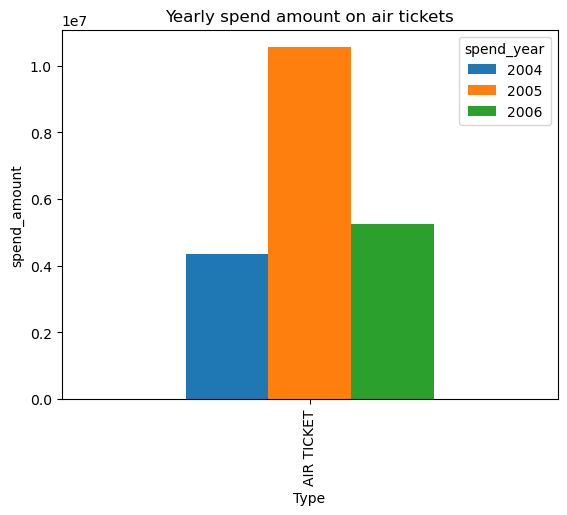

In [108]:
air_tickets=pd.pivot_table(data=customer_spend_trans[customer_spend_trans.Type=='AIR TICKET'],index='Type',columns='spend_year',values='Amount',aggfunc='sum')
air_tickets.plot(kind='bar')
plt.ylabel('spend_amount')
plt.title('Yearly spend amount on air tickets')
plt.show()

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


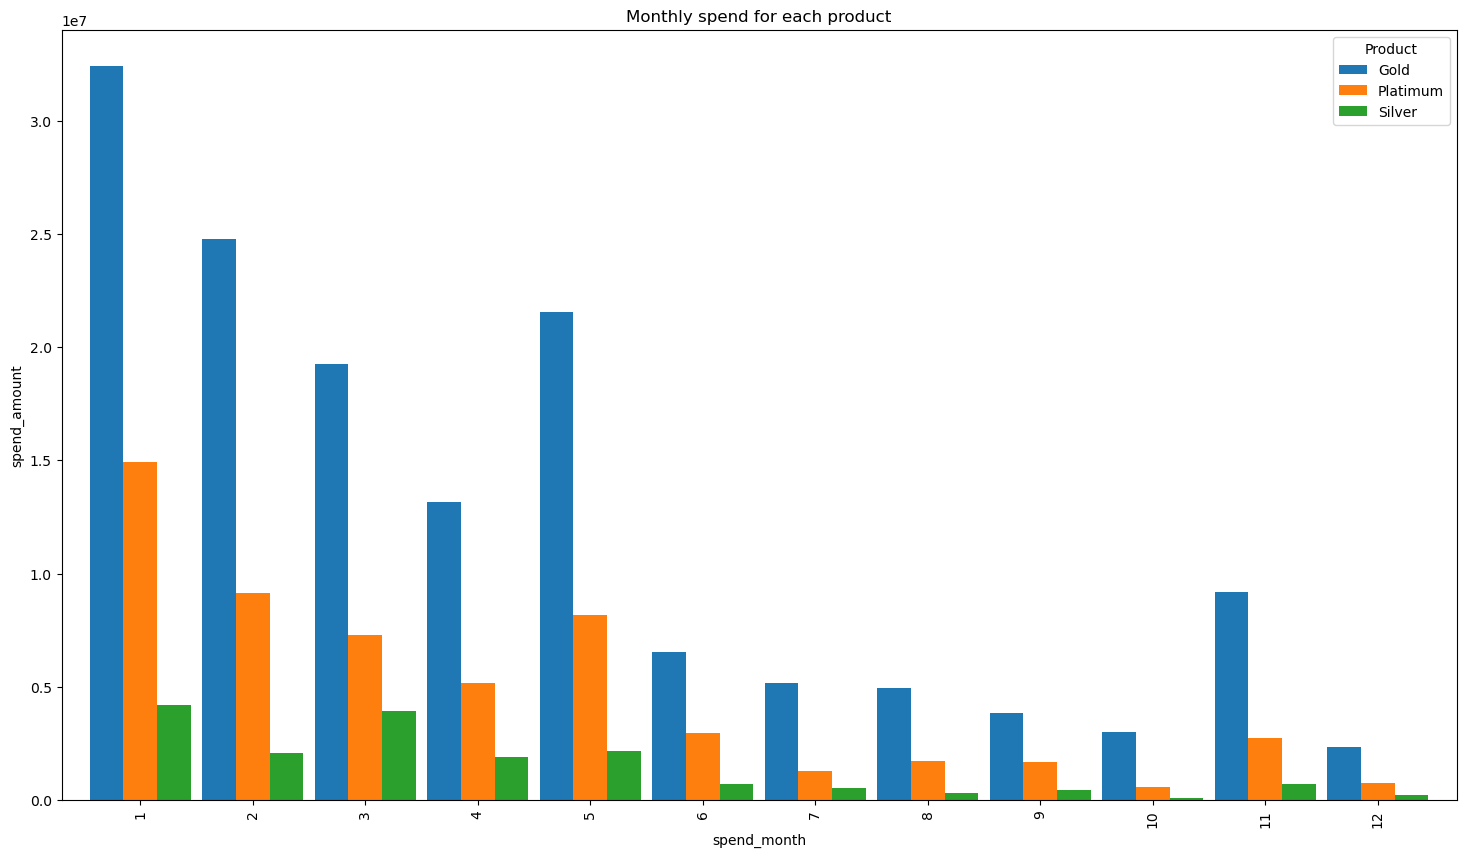

In [117]:
pd.pivot_table(data=customer_spend_trans,index='spend_month',columns='Product',values='Amount',aggfunc='sum').plot(kind='bar',figsize=(18,10),width=0.9)
plt.ylabel('spend_amount')
plt.title('Monthly spend for each product')
plt.show()


In [118]:
## By ploting we can make following conclusion::
## a. Gold is the higest selling product 
## b. Silver is the least selling product.
## c. Peak months of the year lies between Jan to May.
## d. Month of Least sale taken by December.

# 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [120]:
customer_repayment_trans['repayment_year']=customer_repayment_trans.Month.dt.year

In [130]:
def top_10_customers(product_category,time_period):
    return customer_repayment_trans.loc[(customer_repayment_trans.Product==product_category)].groupby(['Customer','City','Product','Company',time_period]).Amount.sum().reset_index().sort_values(by='Amount',ascending=False).head(10)
 

In [136]:
product_category=str(input("Enter the product category in these three:::\\Gold\\Platinum\\Silver\\"))
time_period=str(input("Enter the time period in these two:::\\repayment_year\\repayment_month\\"))

Enter the product category in these three:::\Gold\Platinum\Silver\Silver
Enter the time period in these two:::\repayment_year\repayment_month\repayment_month


In [138]:
Analysis=top_10_customers(product_category,time_period)
Analysis

,Customer,City,Product,Company,repayment_month,Amount
16,A22,BOMBAY,Silver,C22,1,900000.00
57,A46,PATNA,Silver,C8,1,713614.32
107,A8,PATNA,Silver,C8,1,600012.00
85,A6,DELHI,Silver,C6,1,600000.00
3,A18,BANGALORE,Silver,C18,3,600000.00
93,A7,COCHIN,Silver,C7,1,594009.28
47,A25,COCHIN,Silver,C7,1,586332.08
67,A57,TRIVANDRUM,Silver,C19,3,578549.42
51,A25,COCHIN,Silver,C7,5,572616.74
58,A46,PATNA,Silver,C8,2,544231.79
